# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cassino
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | valparaiso
Processing Record 4 of Set 1 | argo
Processing Record 5 of Set 1 | anadyr
Processing Record 6 of Set 1 | rongelap
Processing Record 7 of Set 1 | broken hill
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | qarchi gak
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | khandyga
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | belyy yar
Processing Record 15 of Set 1 | ola
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | ouargla
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | coari
Processing Record 20 of Set 1 | san antonio de pale
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | blackmans

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cassino,41.4876,13.8315,9.18,76,72,1.34,IT,1704767719
1,puerto natales,-51.7236,-72.4875,4.54,90,100,4.18,CL,1704767486
2,valparaiso,-33.0393,-71.6273,16.80,59,0,3.09,CL,1704767720
3,argo,37.6333,22.7333,9.32,80,100,1.68,GR,1704767720
4,anadyr,64.7500,177.4833,-18.72,77,75,11.00,RU,1704767720


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cassino,41.4876,13.8315,9.18,76,72,1.34,IT,1704767719
1,puerto natales,-51.7236,-72.4875,4.54,90,100,4.18,CL,1704767486
2,valparaiso,-33.0393,-71.6273,16.80,59,0,3.09,CL,1704767720
3,argo,37.6333,22.7333,9.32,80,100,1.68,GR,1704767720
4,anadyr,64.7500,177.4833,-18.72,77,75,11.00,RU,1704767720


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

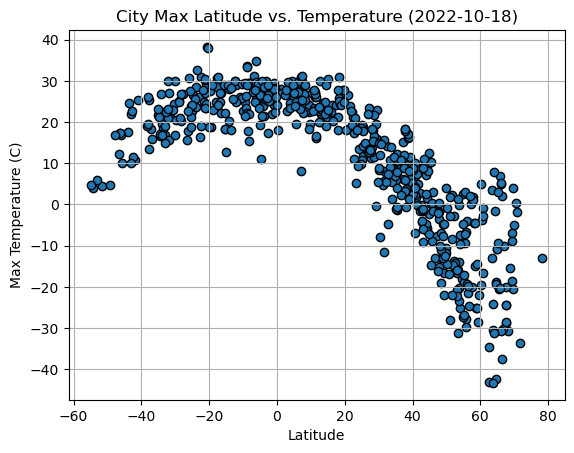

In [8]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"].astype("float")
y = city_data_df["Max Temp"].astype("float")
plt.scatter(x, y, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

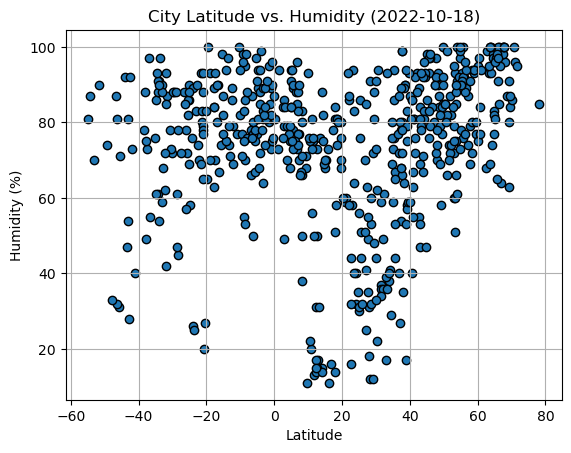

In [9]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"].astype("float")
y = city_data_df["Humidity"].astype("float")
plt.scatter(x, y, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

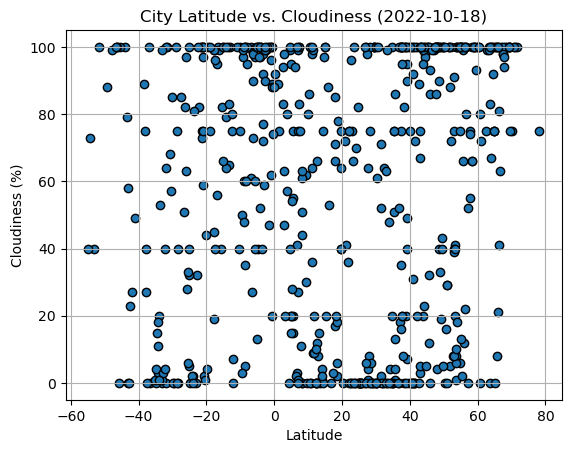

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"].astype("float")
y = city_data_df["Cloudiness"].astype("float")
plt.scatter(x, y, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

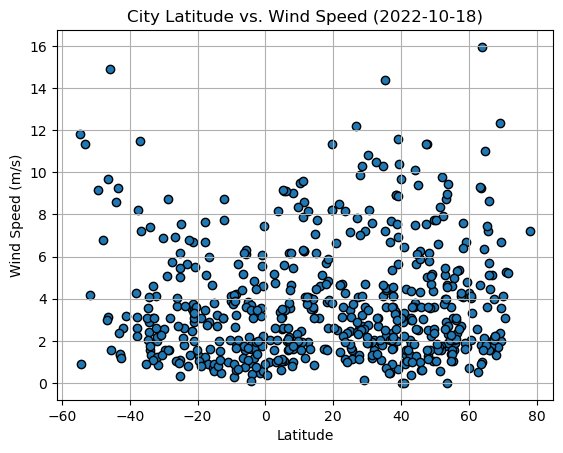

In [11]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"].astype("float")
y = city_data_df["Wind Speed"].astype("float")
plt.scatter(x, y, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, xlabel, ylabel, title, annotate_location):
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, annotate_location, fontsize=15, color="red")
    
    # Label plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Print r square value
    print(f"The r-value is: {rvalue}")
    print(f"The p-value is: {pvalue}")
    
    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cassino,41.4876,13.8315,9.18,76,72,1.34,IT,1704767719
3,argo,37.6333,22.7333,9.32,80,100,1.68,GR,1704767720
4,anadyr,64.7500,177.4833,-18.72,77,75,11.00,RU,1704767720
5,rongelap,11.1635,166.8941,26.87,75,98,7.89,MH,1704767721
7,jamestown,42.0970,-79.2353,2.77,93,100,3.09,US,1704767672


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,4.54,90,100,4.18,CL,1704767486
2,valparaiso,-33.0393,-71.6273,16.80,59,0,3.09,CL,1704767720
6,broken hill,-31.9500,141.4333,27.16,42,0,1.99,AU,1704767721
15,edinburgh of the seven seas,-37.0676,-12.3116,18.34,97,100,11.48,SH,1704767724
17,invercargill,-46.4000,168.3500,17.23,81,100,3.13,NZ,1704767724


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8668239568455186
The p-value is: 2.5215262858819496e-119


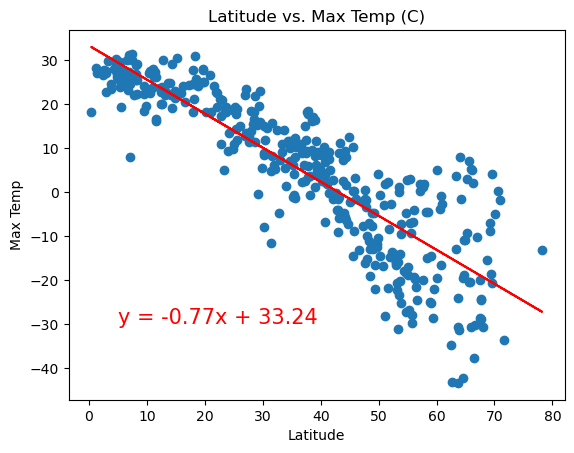

In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
annotate_location = (5, -30)
linear_regression(x_values, y_values, "Latitude", "Max Temp", "Latitude vs. Max Temp (C)",
                  annotate_location)

The r-value is: 0.5705610584356645
The p-value is: 2.7878104979778714e-17


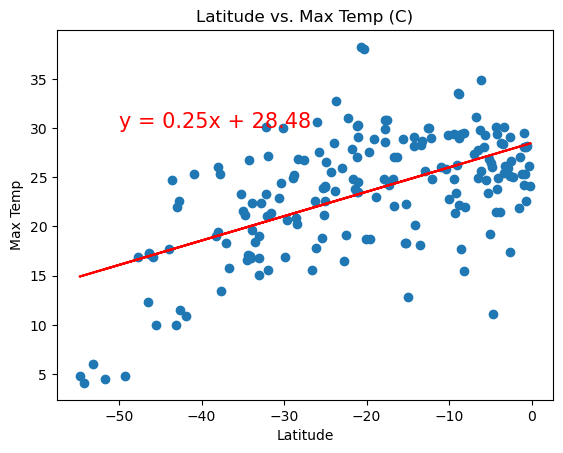

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
annotate_location = (-50, 30)
linear_regression(x_values, y_values, "Latitude", "Max Temp", "Latitude vs. Max Temp (C)",
                  annotate_location)

**Discussion about the linear relationship:**
##### There seems to be a linear relationship since the p-values are very small for both northern and southern hemispheres, and the r-values are far from 0.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.39395962374714866
The p-value is: 6.248397892763634e-16


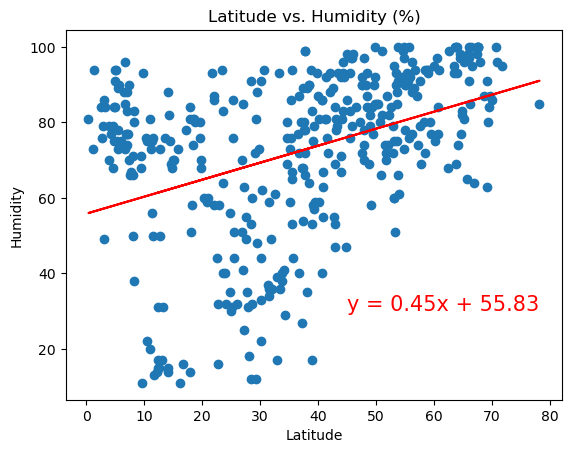

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
annotate_location = (45, 30)
linear_regression(x_values, y_values, "Latitude", "Humidity", "Latitude vs. Humidity (%)",
                  annotate_location)

The r-value is: 0.26835765590320454
The p-value is: 0.00023035597243916978


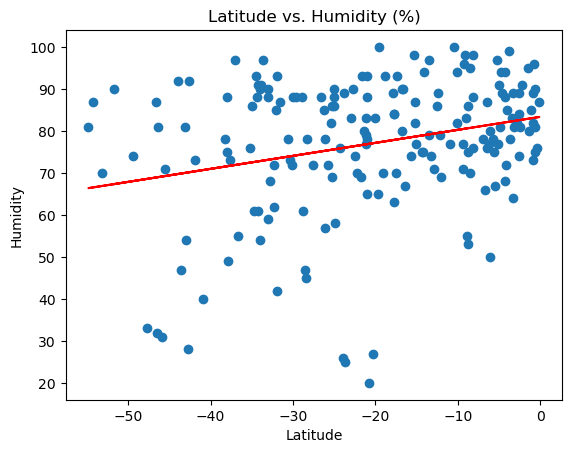

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
annotate_location = (45, 30)
linear_regression(x_values, y_values, "Latitude", "Humidity", "Latitude vs. Humidity (%)",
                  annotate_location)

**Discussion about the linear relationship:**
##### It seems to have a low linear relationship since the r-value is close to 0.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.29134118865034564
The p-value is: 4.553415988645048e-09


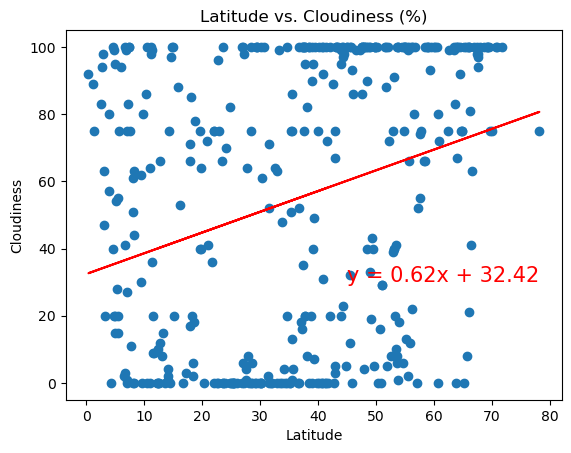

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
annotate_location = (45, 30)
linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Latitude vs. Cloudiness (%)",
                  annotate_location)

The r-value is: 0.3276550096115465
The p-value is: 5.6199253666087855e-06


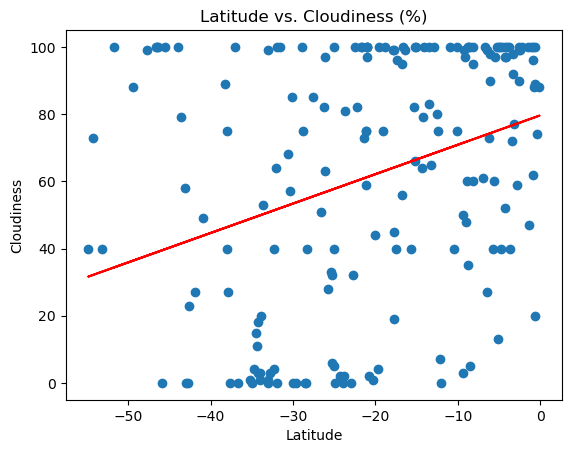

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
annotate_location = (45, 30)
linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Latitude vs. Cloudiness (%)",
                  annotate_location)

**Discussion about the linear relationship:**
##### It seems to have a low linear relationship since the r-values are close to 0.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.018478490861255484
The p-value is: 0.7160217973358046


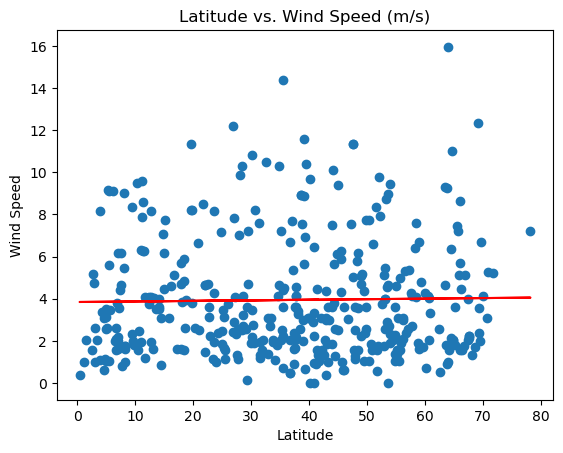

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
annotate_location = (45, 30)
linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Latitude vs. Wind Speed (m/s)",
                  annotate_location)

The r-value is: -0.2996646284944118
The p-value is: 3.5880881060667114e-05


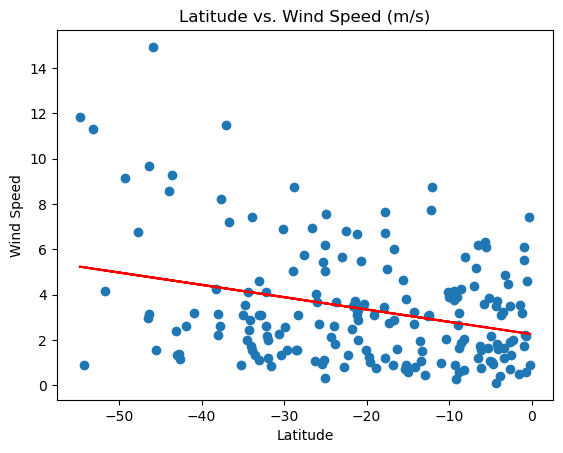

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
annotate_location = (45, 30)
linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Latitude vs. Wind Speed (m/s)",
                  annotate_location)

**Discussion about the linear relationship:**
##### It seems to have a low linear relationship since the r-values are close to 0.